# Robustness of Graph Neural Networks at Scale - Quick Start

This notebook can be run in google colab and serves as a quick introduction to the [Robustness of Graph Neural Networks at Scale](https://github.com/sigeisler/robustness_of_gnns_at_scale) repository.

## 0. Setup

First, let's get the code and install requirements.


In [ ]:
import config
%cd {config.PROJECT_DIR}

### Imports

In [2]:
# run
import seml

In [3]:
#7 run
#%cd robustness_of_gnns_at_scale
from matplotlib import pyplot as plt

from experiments import (
    experiment_train,
    experiment_local_attack_direct,
    experiment_global_attack_direct
)

%matplotlib inline

%load_ext autoreload
%autoreload 2

Use from seml.experiment import setup_logger instead.
Note that seml.experiment.Experiment already includes the logger setup.
See https://github.com/TUM-DAML/seml/blob/master/examples/example_experiment.py


[02/24/25 17:37:39] WARNING  Importing setup_logger directly from seml is deprecated.                ]8;id=427208;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\seml\__init__.py\__init__.py]8;;\:]8;id=563796;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\seml\__init__.py#10\10]8;;\
                             Use from seml.experiment import setup_logger instead.                                 
                             Note that seml.experiment.Experiment already includes the logger setup.               
                             See                                                                                   
                             https://github.com/TUM-DAML/seml/blob/master/examples/example_experimen               
                             t.py                                                                                  

[02/24/25 17:37:39] WARNING  Importing setup_logger directly from seml is deprecated.                ]8;id=600986;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\seml\__init__.py\__init__.py]8;;\:]8;id=257103;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\seml\__init__.py#10\10]8;;\
                             Use from seml.experiment import setup_logger instead.                                 
                             Note that seml.experiment.Experiment already includes the logger setup.               
                             See                                                                                   
                             https://github.com/TUM-DAML/seml/blob/master/examples/example_experimen               
                             t.py                                                                                  

## 1. Training

For the training and evaluation code we decided to provide Sacred experiments which make it very easy to run the same code from the command line or on your cluster. To train or attack the models you can use the `script_execute_experiment` script and simply specify the respective configuration or execute the experiment directly by passing the desired configuration in [experiments/experiment_train.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_train.py#L74).

In the example below, we train a `GCN` on `Cora ML`.

In [ ]:
train_statistics = experiment_train.run(
    data_dir = './data',
    dataset = 'cora_ml',
    model_params = dict(
        label="Vanilla GCN",
        model="GCN",
        do_cache_adj_prep=True,
        n_filters=64,
        dropout=0.5,
        svd_params=None,
        jaccard_params=None,
        gdc_params={"alpha": 0.15, "k": 64}),
    train_params = dict(
        lr=1e-2,
        weight_decay=1e-3,
        patience=300,
        max_epochs=3000),
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    model_storage_type = 'demo',
    ppr_cache_params = dict(),
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    display_steps = 100,
    debug_level = "info"
)

# plot train and val loss curves
fig, ax = plt.subplots()

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax.set_xlabel('Epoch $t$')
ax.set_ylabel("Loss")
ax.plot(train_statistics['trace_train'], color=color, label='Train')

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
ax.plot(train_statistics['trace_val'], color=color, label='Val')
ax.legend()

plt.show()

[02/24/25 17:37:40] INFO     {'dataset': 'cora_ml', 'model_params': {'label': 'Vanilla      ]8;id=28861;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=721925;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#140\140]8;;\
                             GCN', 'model': 'GCN', 'do_cache_adj_prep': True, 'n_filters':                         
                             64, 'dropout': 0.5, 'svd_params': None, 'jaccard_params':                             
                             None, 'gdc_params': {'alpha': 0.15, 'k': 64}}, 'train_params':                        
                             {'lr': 0.01, 'weight_decay': 0.001, 'patience': 300,                                  
                             'max_epochs': 3000}, 'binary_attr': False, 'make_undirected':                         
                             True, 'seed': 0, 'artifact_dir': 'cache',                                             
                             'model_storage_type': 'demo', 'ppr_cache_params': {},                                 
                             'device': 'cpu', 'display_steps': 100, 'data_device': 'cpu'}                          

                    INFO     Training set size: 140                                         ]8;id=289866;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=668541;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#161\161]8;;\

                    INFO     Validation set size: 140                                       ]8;id=804383;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=567972;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#162\162]8;;\

                    INFO     Test set size: 2530                                            ]8;id=13400;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=760309;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#163\163]8;;\

                    INFO     Memory Usage after loading the dataset:                        ]8;id=241783;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=321960;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#183\183]8;;\

                    INFO     nan                                                            ]8;id=6603;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=205984;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_train.py#184\184]8;;\

E:\Masterarbeit\ProjectCombined\rgnn_at_scale\models\gcn.py:315: UserWarning: torch.sparse.SparseTensor(indices, values, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, dtype=, device=). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:634.)
  adj = get_ppr_matrix(torch.sparse.FloatTensor(edge_idx, edge_weight), **self.gdc_params)
E:\Anaconda\envs\Masterarbeit\Lib\site-packages\torch_sparse\tensor.py:574: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\SparseCsrTensorImpl.cpp:55.)
  return torch.sparse_csr_tensor(rowptr, col, value, self.sizes())


                    INFO                                                                                ]8;id=277801;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=68136;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch    0: loss_train: 1.94657, loss_val: 1.94478, acc_train: 0.10000,               
                             acc_val: 0.18571                                                                      

[02/24/25 17:37:43] INFO                                                                                ]8;id=565938;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=493343;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  100: loss_train: 0.09275, loss_val: 0.42175, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[02/24/25 17:37:45] INFO                                                                                ]8;id=879458;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=688920;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  200: loss_train: 0.07186, loss_val: 0.37577, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[02/24/25 17:37:48] INFO                                                                                ]8;id=537563;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=564552;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  300: loss_train: 0.07155, loss_val: 0.39984, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[02/24/25 17:37:50] INFO                                                                                ]8;id=462100;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=907735;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  400: loss_train: 0.06852, loss_val: 0.38230, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[02/24/25 17:37:53] INFO                                                                                ]8;id=385534;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=985326;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  500: loss_train: 0.06982, loss_val: 0.36410, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[02/24/25 17:37:55] INFO                                                                                ]8;id=974003;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py\train.py]8;;\:]8;id=24261;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  600: loss_train: 0.06437, loss_val: 0.40359, acc_train: 1.00000,               
                             acc_val: 0.87857                                                                      

In [4]:
clean_acc = train_statistics["accuracy"]
print(f'Accuracy of the model: {100*clean_acc:.2f}%')

Accuracy of the model: 83.52%


## 1.1 Certificate integration

In [ ]:
#TODO
'''We need the following variables:
chosen model: GCN(
                    (conv1): SparseGCNConv(2879, 64)
                    (conv2): GCNConv(64, 7)
)
graph: for 
    edge_idx
    attr_idx
    n
    d
    nc
a dict containing:
    conv1.bias 
    conv2.bias
    conv1.lin.weight
    conv2.lin.weight

'''
 

In [5]:
# certificate integration
import torch
import numpy as np
import copy
from sparse_smoothing.models import GCN
from sparse_smoothing.utils import load_and_standardize

loaded_from_robustness = torch.load(f'cache/demo/demo_1.pt', map_location='cpu', weights_only=False)

trained_state_dict = copy.deepcopy(loaded_from_robustness)

for key in list(trained_state_dict.keys()):
    if 'layers.0.' in key:
        new_key = key.replace('layers.0.gcn_0', 'conv1')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

for key in list(trained_state_dict.keys()):
    if 'layers.1.' in key:
        new_key = key.replace('layers.1.gcn_1', 'conv2')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

In [6]:
graph = load_and_standardize('data/cora_ml.npz')
n, d = graph.attr_matrix.shape
nc = graph.labels.max() + 1
pf_plus_att = 0.01
pf_minus_att = 0.6

In [7]:
model = GCN(n_features=d, n_classes=nc, n_hidden=64)#.cuda()
# Load the modified state dictionary
model.load_state_dict(trained_state_dict)

<All keys matched successfully>

In [8]:
print(model)
print(model.conv1.lin.weight)
print(model.conv2)



GCN(
  (conv1): SparseGCNConv(2879, 64)
  (conv2): GCNConv(64, 7)
)
Parameter containing:
tensor([[-0.0027, -0.0180, -0.0029,  ..., -0.0004, -0.0104, -0.0375],
        [-0.0074, -0.0102,  0.0018,  ..., -0.0066,  0.0135, -0.0341],
        [-0.0053, -0.0259, -0.0032,  ..., -0.0038, -0.0104, -0.0140],
        ...,
        [-0.0095, -0.0416,  0.0013,  ..., -0.0073, -0.0054, -0.0214],
        [ 0.0120,  0.0191,  0.0013,  ...,  0.0033,  0.0030, -0.0282],
        [ 0.0101, -0.0143, -0.0029,  ...,  0.0035,  0.0083,  0.0320]],
       requires_grad=True)
GCNConv(64, 7)


In [9]:
edge_idx = torch.LongTensor(np.stack(graph.adj_matrix.nonzero()))#.cuda()
attr_idx = torch.LongTensor(np.stack(graph.attr_matrix.nonzero()))#.cuda()

In [10]:
from sparse_smoothing.prediction import predict_smooth_gnn
#n_samples_eval = 100_000
#n_samples_eval = 10_000
n_samples_eval = 100

sample_config = {
    'n_samples': n_samples_eval,
    'pf_plus_adj': 0,
    'pf_minus_adj': 0,
    'pf_plus_att': 0.01,
    'pf_minus_att': 0.6,
}
batch_size = 50

sample_config_pre_eval = sample_config.copy()
sample_config_pre_eval['n_samples'] = 1_000


import torch


# we a small number of samples to estimate the majority class
pre_votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                               sample_config=sample_config_pre_eval,
                               model=model, n=n, d=d, nc=nc,
                               batch_size=batch_size)

# we use a larger number of samples to estimate a lower bound
# on the probability of observing the majority class
votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                           sample_config=sample_config,
                           model=model, n=n, d=d, nc=nc,
                           batch_size=batch_size)

print(votes)


[[ 99   0   0 ...   0   0   1]
 [  0 100   0 ...   0   0   0]
 [  0  98   0 ...   0   2   0]
 ...
 [ 77   0   0 ...  16   6   1]
 [  0   0   0 ...   0   0 100]
 [  3  25   0 ...   9   0  59]]


In [11]:
from sparse_smoothing.cert import p_lower_from_votes, binary_certificate_grid


conf_alpha = 0.01

# compute the lower bound on the probability of the majority class
p_lower = p_lower_from_votes(votes=votes, pre_votes=pre_votes, alpha=conf_alpha, n_samples=n_samples_eval)

# compute the binary-class certificate 2D grid (for all pairs of ra and rd radii)
# where grid_binary_class > 0.5 means the instance is robust
grid_binary_class, *_ = binary_certificate_grid(pf_plus=pf_plus_att, pf_minus=pf_minus_att,
                                            p_emps=p_lower, reverse=False, progress_bar=True)


max_ra=1, max_rd=4, min_p_emp=0.6970


In [12]:
grid_radii = (grid_binary_class>0.5)

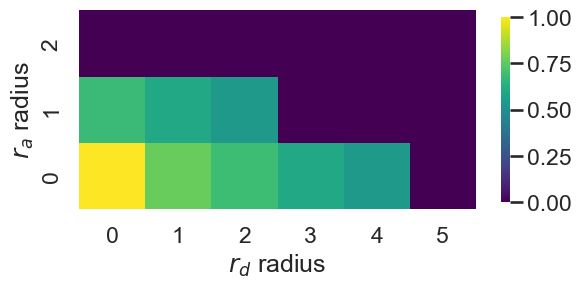

In [13]:
import seaborn as sns

heatmap = (grid_binary_class>0.5).mean(0)
sns.set_context('talk')
sns.heatmap(heatmap,
            cmap='viridis',
            vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
plt.xlim(0, heatmap.shape[1])
plt.ylim(0, heatmap.shape[0])
plt.xlabel('$r_d$ radius')
plt.ylabel('$r_a$ radius')
plt.show()

In [14]:
from sparse_smoothing.cert import regions_discrete, compute_rho_for_many
# if pf_plus = pf_minus any combination of ra+rd+rc=r gives the same result.
pf_plus = pf_minus = 0.8
ra = 1
rd = 0
rc = 0

n_discrete_categories = 2

regions = regions_discrete(ra=ra, rd=rd, rc=rc, k=n_discrete_categories, pf_plus=pf_plus, pf_minus=pf_minus)

percent_robust = (compute_rho_for_many(regions=regions, p_emps=p_lower)>0.5).mean() * 100

print(f'At radius r={ra+rd+rc}, {percent_robust} percent of nodes are certifiably robust')

At radius r=1, 62.45551601423488 percent of nodes are certifiably robust


## 2. Evaluation

For evaluation, we use the locally stored models. Similarly to training, we provide a script that runs the attacks for different seeds for all pretrained models. For all experiments, please check out the [config](https://github.com/sigeisler/robustness_of_gnns_at_scale/tree/main/config) folder.

### 2.1 Local PR-BCD Attack
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [16]:
local_prbcd_statistics = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100,
        search_space_size = 10_000,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info"
)

[02/24/25 17:36:56] INFO     {'dataset': 'cora_ml', 'attack': 'LocalPRBCD', 'attack_params':           ]8;id=162737;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=391253;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#38\38]8;;\
                             {'ppr_cache_params': {'data_artifact_dir': 'cache', 'data_storage_type':              
                             'ppr'}, 'epochs': 50, 'fine_tune_epochs': 100, 'search_space_size':                   
                             10000, 'ppr_recalc_at_end': True, 'loss_type': 'Margin', 'lr_factor':                 
                             0.05}, 'epsilons': [1], 'make_undirected': True, 'binary_attr': False,                
                             'seed': 0, 'artifact_dir': 'cache', 'pert_adj_storage_type': None,                    
                             'pert_attr_storage_type': None, 'model_label': 'Vanilla GCN',                         
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 3010358181840 acquired on cache\demo.json.lock                    ]8;id=799055;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=775986;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 3010358181840 released on cache\demo.json.lock                    ]8;id=487085;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=736839;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Found 1 models with label 'Vanilla GCN' to       ]8;id=790822;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=975042;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#141\141]8;;\
                             attack.                                                                               

                    INFO     Sample Attack Nodes for model with accuracy 0.8352                       ]8;id=951790;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=873400;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#166\166]8;;\

                    INFO     Found 2530 suitable '1+ degree' nodes out of 2530 candidate nodes to be  ]8;id=596186;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=239967;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#132\132]8;;\
                             sampled from for the attack of which 2113 have the correct class label                

                    INFO     Sample the following attack nodes:                                       ]8;id=39494;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=405277;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#171\171]8;;\
                             [475]                                                                                 
                             [2105]                                                                                
                             [1707  834]                                                                           

                    INFO     Original: Loss: -9.881260871887207 Statstics: {'logit_target':       ]8;id=852195;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=710708;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#74\74]8;;\
                             -0.0002615109842736274, 'logit_best_non_target': -9.881522178649902,                  
                             'confidence_target': np.float64(0.9997385232067433),                                  
                             'confidence_non_target': np.float64(5.1110419437683184e-05),                          
                             'margin': np.float64(0.9996874127873056)}                                             
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -9.881260871887207 Statstics: {'logit_target':        ]8;id=940003;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=362530;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#92\92]8;;\
                             -0.0002615109842736274, 'logit_best_non_target': -9.881522178649902,                  
                             'confidence_target': np.float64(0.9997385232067433),                                  
                             'confidence_non_target': np.float64(5.1110419437683184e-05),                          
                             'margin': np.float64(0.9996874127873056)}                                             
                                                                                                                   

[02/24/25 17:36:57] INFO                                                                         ]8;id=615774;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=392029;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#113\113]8;;\
                             Epoch: 0 Loss: -9.881260871887207 Statstics: {'logit_target':                         
                             -0.0002740246127359569, 'logit_best_non_target':                                      
                             -9.839203834533691, 'confidence_target':                                              
                             np.float64(0.9997260129285791), 'confidence_non_target':                              
                             np.float64(5.331974556396946e-05), 'margin':                                          
                             np.float64(0.9996726931830151)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.3844868242740631 std 0.191074401140213 with base    ]8;id=657518;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=347886;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#114\114]8;;\
                             learning rate 0.1                                                                     

 40%|████      | 20/50 [00:14<00:21,  1.42it/s]

[02/24/25 17:37:11] INFO                                                                         ]8;id=225792;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=168408;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#113\113]8;;\
                             Epoch: 20 Loss: 2.1782126426696777 Statstics: {'logit_target':                        
                             -2.3333029747009277, 'logit_best_non_target': -0.14881308376789093,                   
                             'confidence_target': np.float64(0.0969749118454185),                                  
                             'confidence_non_target': np.float64(0.8617301712031666), 'margin':                    
                             np.float64(-0.7647552593577481)}                                                      
                                                                                                                   

                    INFO     Gradient mean 0.2582426071166992 std 0.16028881072998047 with base  ]8;id=995758;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=159601;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#114\114]8;;\
                             learning rate 0.1                                                                     

 66%|██████▌   | 33/50 [00:23<00:11,  1.44it/s]

KeyboardInterrupt: 

In [14]:
n_change = 0
for node in local_prbcd_statistics['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio =  n_change / len(local_prbcd_statistics['results'])
print(f'Percentage of changed node predictions : {100*flipped_ratio:.2f}%')

Percentage of changed node predictions : 75.00%


### 2.2 Global PR-BCD Attack

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [ ]:
global_prbcd_statistics = experiment_global_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'PRBCD',
    attack_params = dict(
        epochs=500,
        fine_tune_epochs=100,
        keep_heuristic="WeightOnly",
        search_space_size=100_000,
        do_synchronize=True,
        loss_type="tanhMargin",
    ),
    epsilons = [0.25],
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    pert_adj_storage_type = 'evasion_global_adj',
    pert_attr_storage_type = 'evasion_global_attr',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info"
)

print(global_prbcd_statistics)

[01/08/25 19:24:03] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs':     ]8;id=259883;file:///content/robustness_of_gnns_at_scale/experiments/common.py\common.py]8;;\:]8;id=861888;file:///content/robustness_of_gnns_at_scale/experiments/common.py#38\38]8;;\
                             500, 'fine_tune_epochs': 100, 'keep_heuristic': 'WeightOnly',                         
                             'search_space_size': 100000, 'do_synchronize': True, 'loss_type':                     
                             'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,                           
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=814253;file:///content/robustness_of_gnns_at_scale/experiments/experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=973611;file:///content/robustness_of_gnns_at_scale/experiments/experiment_global_attack_direct.py#138\138]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=473231;file:///content/robustness_of_gnns_at_scale/experiments/common.py\common.py]8;;\:]8;id=263066;file:///content/robustness_of_gnns_at_scale/experiments/common.py#109\109]8;;\
                             Execute attack...                                                                     

[01/08/25 19:24:04] INFO                                                                                ]8;id=596351;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=610692;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#86\86]8;;\
                             Before the attack - Loss: -0.6511061787605286 Accuracy: 83.439 %                      
                                                                                                                   

  0%|          | 0/500 [00:00<?, ?it/s]

[01/08/25 19:24:13] INFO                                                                               ]8;id=323528;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=593423;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 0 Loss: -0.6510993242263794 Accuracy: 79.051 %                                 
                                                                                                                   

  4%|▍         | 20/500 [03:09<1:15:13,  9.40s/it]

[01/08/25 19:27:22] INFO                                                                               ]8;id=552333;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=42856;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 20 Loss: -0.24453163146972656 Accuracy: 60.672 %                               
                                                                                                                   

  8%|▊         | 40/500 [06:18<1:13:28,  9.58s/it]

[01/08/25 19:30:32] INFO                                                                               ]8;id=456101;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=611665;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 40 Loss: -0.16238142549991608 Accuracy: 56.957 %                               
                                                                                                                   

 12%|█▏        | 60/500 [09:25<1:09:53,  9.53s/it]

[01/08/25 19:33:39] INFO                                                                               ]8;id=987569;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=321940;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 60 Loss: -0.13186274468898773 Accuracy: 55.534 %                               
                                                                                                                   

 16%|█▌        | 80/500 [12:34<1:06:18,  9.47s/it]

[01/08/25 19:36:49] INFO                                                                               ]8;id=45116;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=232975;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 80 Loss: -0.11300715804100037 Accuracy: 54.506 %                               
                                                                                                                   

 20%|██        | 100/500 [15:45<1:02:48,  9.42s/it]

[01/08/25 19:39:59] INFO                                                                               ]8;id=46440;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=537010;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 100 Loss: -0.10065988451242447 Accuracy: 53.874 %                              
                                                                                                                   

 24%|██▍       | 120/500 [18:58<1:00:54,  9.62s/it]

[01/08/25 19:43:11] INFO                                                                               ]8;id=519570;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py\prbcd.py]8;;\:]8;id=301469;file:///content/robustness_of_gnns_at_scale/rgnn_at_scale/attacks/prbcd.py#132\132]8;;\
                             Epoch: 120 Loss: -0.08779348433017731 Accuracy: 53.123 %                              
                                                                                                                   

In [ ]:
perturbed_acc = global_prbcd_statistics["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack: {100*perturbed_acc:.2f}%')

Clean accuracy: 81.90%; Accuracy after global PRBCD attack: 52.25%
